In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv('avocado.csv')
df=pd.DataFrame(data)

In [3]:
# reformatting the column names to remove spaces
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_')

In [4]:
# convert date from string to datetime format
data['date']=pd.to_datetime(data.date)

In [5]:
# add a column 'quarter' to the dataframe
data['quarter']=data.date.dt.quarter

In [6]:
# sorting through the dataframe for relevant data
sea_org = data[(data.region == 'Seattle') & (data.type=='organic')]
sea_con = data[(data.region == 'Seattle') & (data.type!='organic')]

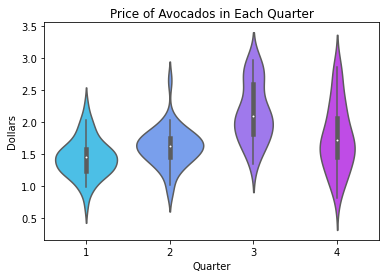

In [11]:
# plotting the daily average price of avo in Seattle
df3=pd.DataFrame({'quarter':sea_org.quarter,'AvgPrice':sea_org.averageprice})

sns.violinplot(x=df3.quarter, y=df3.AvgPrice, palette="cool")
plt.title("Price of Avocados in Each Quarter")
plt.xlabel("Quarter")
plt.ylabel("Dollars")
plt.savefig('price_quarter.png')
plt.show()

In [8]:
# Retrieving quarterly average price and appending the data to a list
# ORGANIC
org_qlist=["sea_org_q1","sea_org_q2","sea_org_q3","sea_org_q4"]
org_qdata = []
for c in range(4):
    for i in range(4):
        org_qlist[i]=sea_org[sea_org.quarter==i+1]
    org_qdata.append(org_qlist[c].averageprice)

In [9]:
# CONVENTIONAL
con_qlist=["sea_con_q1","sea_con_q2","sea_con_q3","sea_con_q4"]
con_qdata=[]
for c in range(4):
    for i in range(4):
        con_qlist[i]=sea_con[sea_con.quarter==i+1]
    con_qdata.append(con_qlist[c].averageprice)

<Figure size 1080x720 with 0 Axes>

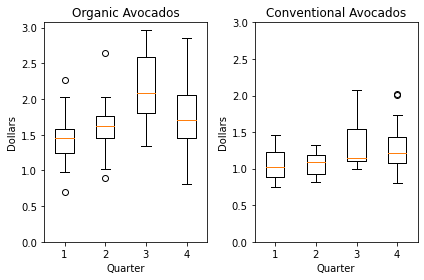

In [12]:
# Box plots showing quarterly price differences
plt.figure(figsize=(15,10))
fig, axs = plt.subplots(1,2)
#organic
axs[0].boxplot(org_qdata)
axs[0].set_title("Organic Avocados")
axs[0].set_xlabel("Quarter")
axs[0].set_ylabel("Dollars")
axs[0].set_yticks([0,0.5,1,1.5,2,2.5,3])

#conventional
axs[1].boxplot(con_qdata)
axs[1].set_title("Conventional Avocados")
axs[1].set_xlabel("Quarter")
axs[1].set_ylabel("Dollars")
axs[1].set_yticks([0,0.5,1,1.5,2,2.5,3])

plt.tight_layout()
plt.savefig('quarterprice_both.png')
plt.show()


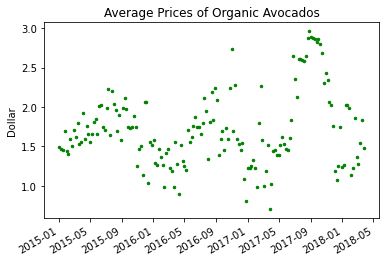

In [13]:
# Average prices for ALL dates
fig, ax = plt.subplots()
plt.subplot(111)
plt.plot_date(sea_org.date,sea_org.averageprice,'go',markersize=2.5)
ax.xaxis_date()
fig.autofmt_xdate()
plt.title('Average Prices of Organic Avocados')
plt.ylabel('Dollar')
plt.savefig('AvgPrice_alldates.png')
plt.show()

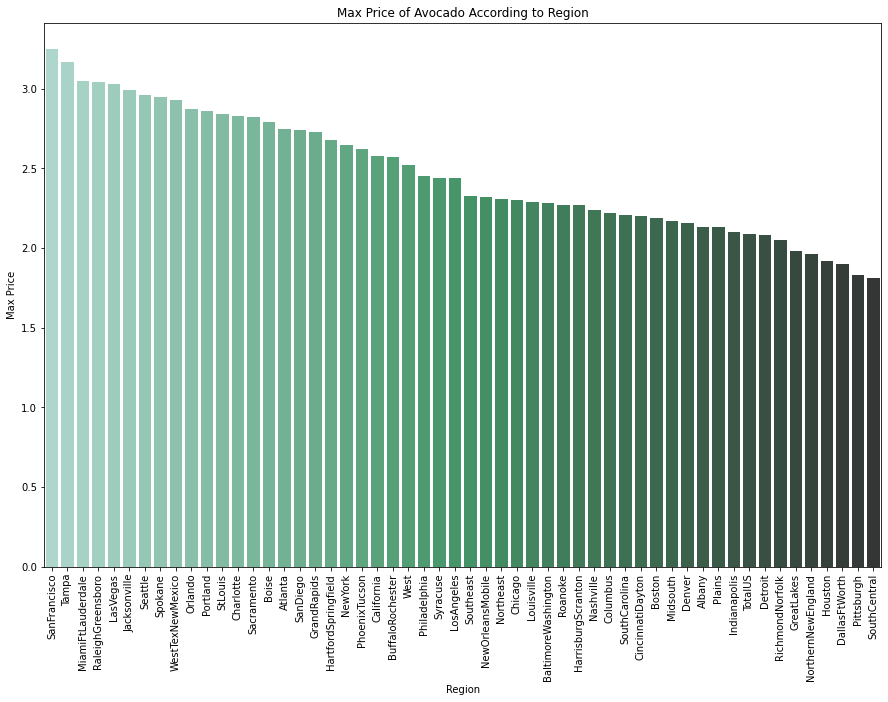

In [14]:
# Finding MAX PRICE of avocados by Region
# AKA How much DESPARATE people are willing to pay for their Avocado Toasts.
region_list=data.region.unique()
max_price=[]

for i in region_list:
    x=data[data.region==i]
    region_max=max(x.averageprice)
    max_price.append(region_max)
    
# Adding the list data into a dataframe and sort
df1=pd.DataFrame({'region_list':region_list,'max_price':max_price})
new_index=df1.max_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

# Plotting it with Seaborn
plt.figure(figsize=(15,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.max_price,palette='BuGn_d')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Max Price')
plt.title('Max Price of Avocado According to Region')
plt.savefig('Max_Price.png')

In [15]:
# TOTAL VOLUME BY YEAR

y2015=data[(data.region == 'Seattle') & (data.year==2015)]
y2016=data[(data.region == 'Seattle') & (data.year==2016)]
y2017=data[(data.region == 'Seattle') & (data.year==2017)]
y2018=data[(data.region == 'Seattle') & (data.year==2018)]

YearData=[y2015,y2016,y2017,y2018]
YearVolume=[]
for y in YearData:
    YearVolume.append(sum(y.total_volume)/1000000)

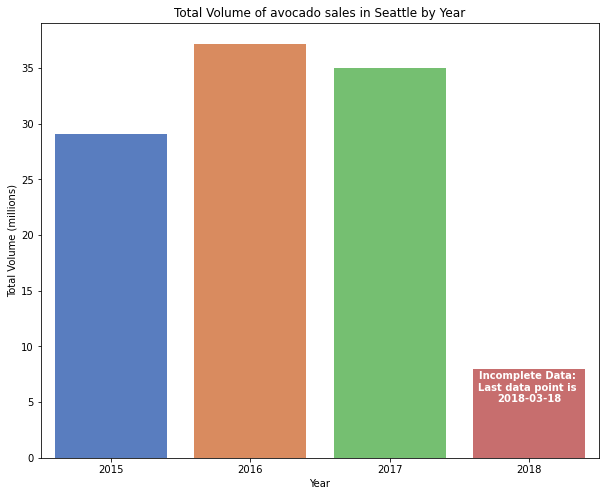

In [17]:
# Plotting the total volume data
df2=pd.DataFrame({'year':[2015,2016,2017,2018],'year_volume':YearVolume})

plt.figure(figsize=(10,8))
ax=sns.barplot(x=df2.year,y=df2.year_volume,palette="muted")
ax.text(3,5,"Incomplete Data: \nLast data point is \n2018-03-18",horizontalalignment='center', size='medium', color='white', weight='bold')
plt.xlabel('Year')
plt.ylabel('Total Volume (millions)')
plt.title('Total Volume of avocado sales in Seattle by Year')
plt.savefig('volume_Seattle.png')

# End Plots
-----------------
## Below is a function that generates avocado prices
## using numpy.random.normal using parameters from the dataframe
###  ...and give snarky comments

In [15]:
# describe method shows basic stats of prices
sea_org.averageprice.describe()

count    169.000000
mean       1.715385
std        0.474803
min        0.700000
25%        1.410000
50%        1.620000
75%        1.980000
max        2.960000
Name: averageprice, dtype: float64

In [16]:
# Storing price statistics in variables
CONprice=sea_con.averageprice.describe()
ORGprice=sea_org.averageprice.describe()

In [17]:
# Adding average price stats with Dictionary comprehesion
stats=['count','mean','std','min','25','50','75','max']
        
seacon={stats[i]:CONprice[i] for i in range(len(stats))}
seaorg={stats[i]:ORGprice[i] for i in range(len(stats))}  

In [18]:
# Random avocado price generator
def generator(avotype):
    result=np.random.normal(loc=avotype['mean'],scale=avotype['std'])
    print("You're buying this avocado for $",format(result,'.2f'),'.',sep='')
    return result

In [19]:
# Snarky price evaluation
def goodeal(price,organic=False):
    if organic==False:
        if price > seacon['25'] and price < seacon['75']:
            print("Good price, that's about how much I paid for mine too.")
        elif price <= seacon['25']:
            print("WOW, where do you shop? I needa get on this deal ASAP!")
        elif price >= seacon['75'] and price <= seacon['max']:
            print("Paying a little too much there, but I get it. \nWhen you gotta have it, you gotta have it.")
        else:
            print("You either REALLY wanted that avocado or you have too much money.\nConsider donating to charity instead?")
    elif organic==True:
        if price > seaorg['25'] and price < seaorg['75']:
            print("I too, like a reasonably priced ORGANIC Avocado.")
        elif price <= seaorg['25']:
            print("OMG did Whole Foods have a sale? Or did you get it from the damaged produce section?")
        elif price >= seaorg['75'] and price <= seaorg['max']:
            print("Ah it must be from the Metropolitan Market. \nThey're pricey, but they always have the best kinds.")
        else:
            print("Only snobs like you would pay that much for an avocado, I bet it's not even ORGANIC!")

In [20]:
# Interactive prompter combining price generator and price evaluation.
def ask():
    answer=input("Are you buying organic or conventional? \n\t1 for organic \n\t2 for conventional\n")
    if answer=='1': # 1 is org / 2 is con
        goodeal(generator(seaorg),organic=True)
        tryagain=input('\nTry again? \n1 for yes\nAny other key to exit\n')
        if tryagain=='1':
            ask()
        else:
            print("Thanks for shopping!")
    elif answer=='2':
        goodeal(generator(seacon))
        tryagain=input('\n\tTry again? \n\t1 for yes\n\tAny other key to exit\n')
        if tryagain=='1':
            ask()
        else:
            print("Thanks for shopping!")
        

# Final Product

In [21]:
# Try it

# ask()